Functions
====

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### What's wrong with this code?

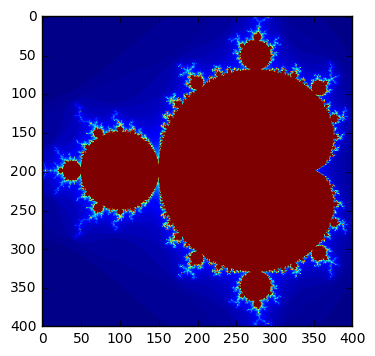

In [2]:
max_iter = 100
h, w = 400, 400

img = np.zeros((h, w)).astype('int')
for i, real in enumerate(np.linspace(-1.5, 0.5, w)):
    for j, imag in enumerate(np.linspace(-1, 1, h)):
        c = complex(real, imag)
        z = 0 + 0j
        for k in range(max_iter):
            z = z*z + c
            if abs(z) > 2:
                break
        img[j, i] = k

plt.grid(False)
plt.imshow(img, cmap=plt.cm.jet)
pass

- hard to understand
- uses global variables
- not re-usable except by copy and paste

#### Refactoring to use functions

In [3]:
def mandel(c, z=0, max_iter=100):
    for k in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return k
    return k

In [4]:
def mandelbrot(w, h, xl=-1.5, xu=0.5, yl=-1, yu=1):
    img = np.zeros((h, w)).astype('int')
    for i, real in enumerate(np.linspace(xl, xu, w)):
        for j, imag in enumerate(np.linspace(yl, yu, h)):
            c = complex(real, imag)
            img[j, i] = mandel(c)
    return img

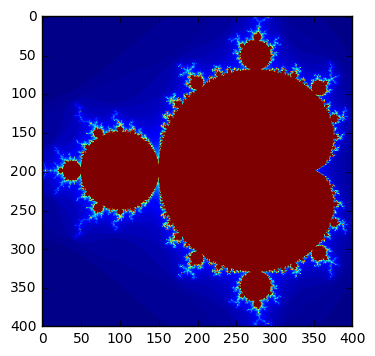

In [5]:
img = mandelbrot(w=400, h=400)
plt.grid(False)
plt.imshow(img, cmap=plt.cm.jet)
pass

#### Function is re-usable

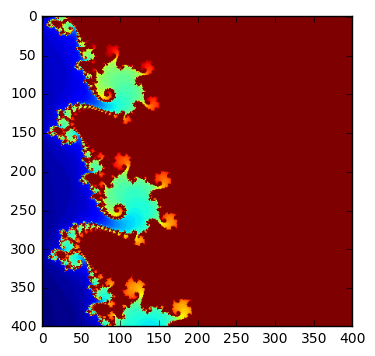

In [6]:
img = mandelbrot(w=400, h=400, xl=-0.75, xu=-0.73, yl=0.1, yu=0.12)
plt.grid(False)
plt.imshow(img, cmap=plt.cm.jet)
pass

### Anonymous functions (lambdas)

In [7]:
def square(x):
    return x*x

In [8]:
square(3)

9

In [9]:
square2 = lambda x: x*x

In [10]:
square2(3)

9

### First class functions

In [11]:
# functions can be treated the same way as (say) an integer

#### Functions can be passed in as arguments

In [12]:
def grad(x, f, h=0.01):
    return (f(x+h) - f(x-h))/(2*h)

In [13]:
def f(x):
    return 3*x**2 + 5*x + 3

In [14]:
grad(0, f)

5.000000000000004

#### Functions can also be returned by functions

In [15]:
import time

def timer(f):
    def g(*args, **kwargs):
        start = time.clock()
        result = f(*args, **kwargs)   
        elapsed = time.clock() - start
        return result, elapsed
    return g

In [16]:
def f(n=1000000):
    s = sum([x*x for x in range(n)])
    return s

timed_func = timer(f)

In [17]:
timed_func()

(333332833333500000, 0.1069659999999999)

#### Decorators

In [18]:
@timer
def g(n=1000000):
    s = sum([x*x for x in range(n)])
    return s

In [19]:
g()

(333332833333500000, 0.10733899999999963)

### Map, filter, reduce

In [20]:
map(lambda x: x*x, [1,2,3,4])

In [21]:
list(map(lambda x: x*x, [1,2,3,4]))

[1, 4, 9, 16]

In [22]:
list(filter(lambda x: x%2==0, [1,2,3,4]))

[2, 4]

In [23]:
from functools import reduce

In [24]:
reduce(lambda x, y: x*y, [1,2,3,4], 10)

240

### List comprehension

In [25]:
[x*x for x in [1,2,3,4]]

[1, 4, 9, 16]

In [26]:
[x for x in [1,2,3,4] if x%2 == 0]

[2, 4]

### Set and dictionary comprehension

In [27]:
{i%3 for i in range(10)}

{0, 1, 2}

In [28]:
{i: i%3 for i in range(10)}

{0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2, 6: 0, 7: 1, 8: 2, 9: 0}

### Generator expressions

In [29]:
(i**2 for i in range(10,15))

<generator object <genexpr> at 0x7fa7673c6048>

In [30]:
for x in (i**2 for i in range(10,15)):
    print(x)

100
121
144
169
196


Generator expressions
----

Generator expressions return a potentially infinite stream, but one at a time thus sparing memory. They are ubiquitous in Python 3, allowing us to handle arbitrarily large data sets. 

In [31]:
def count(i=0):
    while True:
        yield i
        i += 1    

In [32]:
c = count()
next(c)

0

In [33]:
next(c)

1

In [34]:
next(c)

2

In [35]:
list(zip('abcde', count(10)))

[('a', 10), ('b', 11), ('c', 12), ('d', 13), ('e', 14)]

### Itertools

In [36]:
import itertools as it

In [37]:
for i in it.islice(count(), 5, 10):
    print(i)

5
6
7
8
9


In [38]:
for i in it.takewhile(lambda i: i< 5, count()):
    print(i)

0
1
2
3
4


In [39]:
import operator as op

[i for i in it.starmap(op.add, [(1,2), (2,3), (3,4)])]

[3, 5, 7]

In [40]:
fruits = ['appple', 'banana', 'cherry', 'durain', 'eggplant',  'fig']

for k, group in it.groupby(sorted(fruits, key=len), len):
    print(k, list(group))

3 ['fig']
6 ['appple', 'banana', 'cherry', 'durain']
8 ['eggplant']


#### Functools

In [41]:
import functools as fn

In [42]:
rng1 = fn.partial(np.random.normal, 2, .3)
rng2 = fn.partial(np.random.normal, 10, 1)

In [43]:
rng1(10)

array([ 2.41939482,  1.61752809,  1.82480007,  1.8507103 ,  2.04315659,
        1.98037114,  2.42350125,  1.86404044,  2.54745615,  1.64721852])

In [44]:
rng2(10)

array([  9.58666   ,   8.99306423,  11.61669275,  10.58186216,
         9.02068889,  10.17118272,   9.43185483,  10.63962792,
        10.7259915 ,   9.26765097])

In [45]:
fn.reduce(op.add, rng2(10))

102.12876094886668

### Modules

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from pandas import DataFrame, Series
import scipy.stats as ss

In [48]:
DataFrame(ss.beta(2,5).rvs((3,4)), columns=['a', 'b', 'c', 'd'])

,a,b,c,d
0,0.080238,0.277527,0.232416,0.315456
1,0.077171,0.531099,0.061296,0.110789
2,0.171385,0.272976,0.110928,0.611416


#### Where does Python search for modules?

In [49]:
import sys
sys.path

['',
 '/opt/conda/lib/python35.zip',
 '/opt/conda/lib/python3.5',
 '/opt/conda/lib/python3.5/plat-linux',
 '/opt/conda/lib/python3.5/lib-dynload',
 '/opt/conda/lib/python3.5/site-packages/cycler-0.10.0-py3.5.egg',
 '/opt/conda/lib/python3.5/site-packages/setuptools-23.0.0-py3.5.egg',
 '/opt/conda/lib/python3.5/site-packages',
 '/opt/conda/lib/python3.5/site-packages/IPython/extensions',
 '/home/jovyan/.ipython']

#### Creating your own module

In [50]:
%%file my_module.py

PI = 3.14

def my_f(x):
    return PI*x

Writing my_module.py


In [51]:
import my_module as mm

mm.PI

3.14

In [52]:
mm.my_f(2)

6.28

In [53]:
from my_module import PI

In [54]:
PI * 2 * 2

12.56

**Note**: Modules can also be nested within each other - e.g. `numpy.random` to creaate a *package*. We will explore how to create packages in a later session.